In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df =pd.read_csv('kc_house_data.csv')
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
df["date"]= pd.to_datetime(df.date)

In [ ]:
df["house_age"] = [df['date'][index].year - df['yr_built'][index] for index in range(df.shape[0])]

In [ ]:
df['house_age'].agg({'min','max','mean'})

min      -1.000000
max     115.000000
mean     43.317818
Name: house_age, dtype: float64

In [ ]:
len(df[df.house_age < 0])

12

In [ ]:
df[df.house_age < 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
1763,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,...,2860,710,2015,0,98040,47.5784,-122.226,2230,10000,-1
2687,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,...,710,0,2015,0,98144,47.5756,-122.316,1440,4800,-1
7526,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,...,2730,0,2015,0,98072,47.7685,-122.160,2520,6126,-1
8039,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,...,1000,200,2015,0,98144,47.6001,-122.298,1320,1852,-1
14489,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,...,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,-1
17098,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,...,1380,0,2015,0,98122,47.6074,-122.305,1480,3600,-1
19805,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,...,1320,0,2015,0,98122,47.6047,-122.305,1380,1495,-1
20770,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,...,2990,0,2015,0,98133,47.7384,-122.348,1970,18110,-1
20852,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,...,2760,970,2015,0,98103,47.6725,-122.330,1800,4560,-1
20963,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,...,900,140,2015,0,98144,47.5951,-122.301,1350,3000,-1


In [ ]:
df.drop(df[df.house_age < 0].index , inplace =True)
df.reset_index(inplace = True , drop =True)

In [ ]:
(df.yr_renovated.value_counts(normalize = True)* 100).head()

0       95.768714
2014     0.421277
2013     0.171288
2003     0.166659
2005     0.162030
Name: yr_renovated, dtype: float64

correlation between yr_renovated and price is 0.12641646161162906


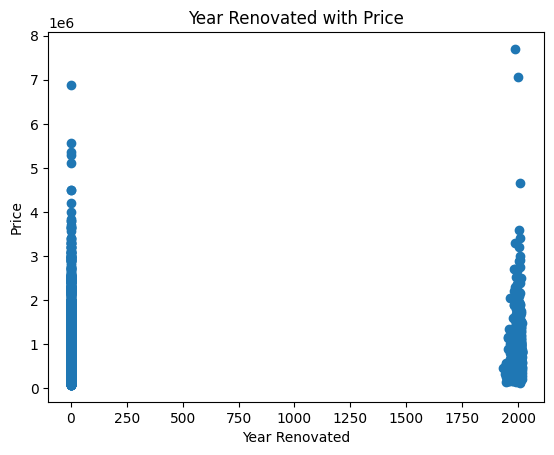

In [ ]:
print("correlation between yr_renovated and price is {}".format(df['yr_renovated'].corr(df['price'])))
plt.scatter(x = df.yr_renovated ,y = df.price)
plt.title("Year Renovated with Price")
plt.xlabel("Year Renovated")
plt.ylabel("Price")
plt.show()

In [ ]:
df.drop("yr_renovated",axis = 1 , inplace =True)

In [ ]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
house_age        0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21601.0,4.579828e+09,2.876324e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21601.0,5.401295e+05,3.672153e+05,7.500000e+04,3.215000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21601.0,3.370909e+00,9.298118e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21601.0,2.114590e+00,7.700687e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21601.0,2.079835e+03,9.182649e+02,2.900000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21601.0,1.511319e+04,4.143112e+04,5.200000e+02,5.042000e+03,7.620000e+03,1.069600e+04,1.651359e+06
floors,21601.0,1.493866e+00,5.396731e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21601.0,7.545947e-03,8.654104e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21601.0,2.343410e-01,7.664180e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21601.0,3.409657e+00,6.508522e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df.drop("id", axis =1 ,inplace =True)

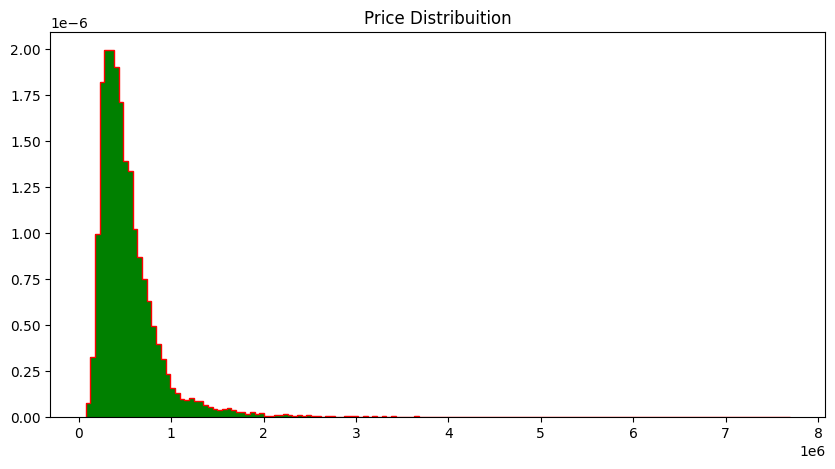

In [ ]:
plt.figure(figsize =(10, 5))
plt.title('Price Distribuition')
plt.hist(df.price , bins =150 , color = "g" ,density =True)
plt.hist(df.price , bins =150 , color = "r" ,density =True , histtype='step' )
plt.show()

<Axes: xlabel='house_age', ylabel='price'>

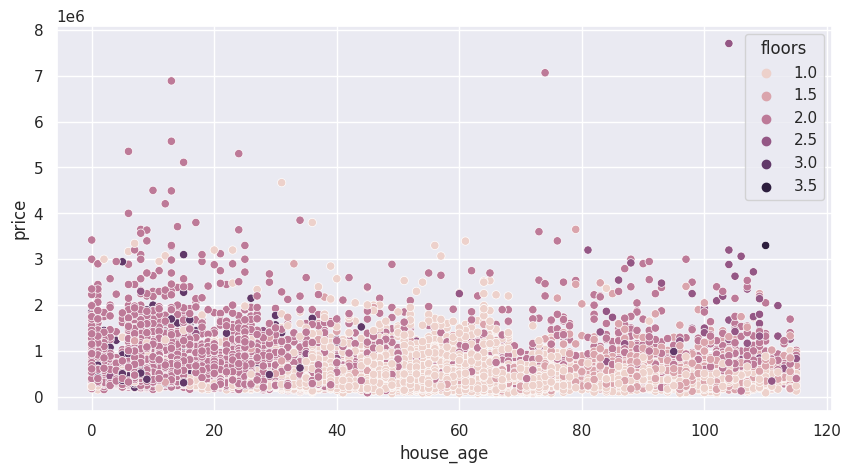

In [ ]:
sns.set(rc ={"figure.figsize":(10,5)})
sns.scatterplot(data =df ,x = 'house_age' , y = 'price'
                , hue = "floors")

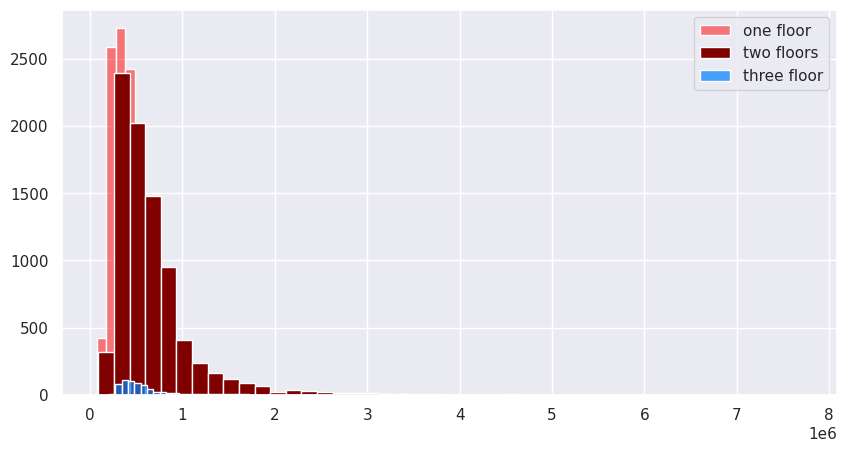

In [ ]:
one = plt.hist(df[(df.floors == 1) | (df.floors ==1.5) ].price ,bins =45,fc=[1,0,0,0.5] ,label = "one floor")
two = plt.hist(df[(df.floors == 2) | (df.floors == 2.5)].price ,bins =45,fc=[0.5,0,0,1] ,label = "two floors")
three = plt.hist(df[(df.floors ==3) | (df.floors == 3.5)].price ,bins =45,fc=[0,0.5,1,0.7] ,label = "three floor")
plt.legend()
plt.show()

In [ ]:
df.floors.value_counts(normalize =True)

1.0    0.494422
2.0    0.381186
1.5    0.088376
3.0    0.028193
2.5    0.007453
3.5    0.000370
Name: floors, dtype: float64

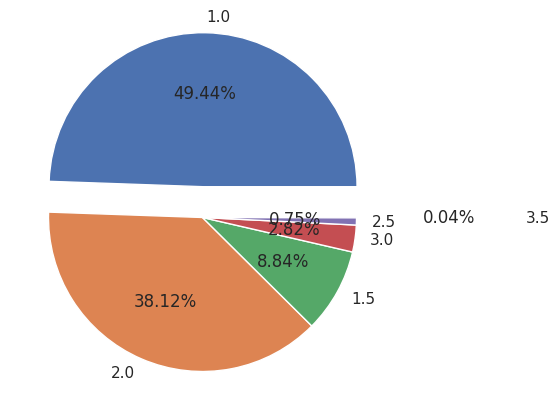

In [ ]:
plt.pie(df.floors.value_counts(normalize =True) , explode =[0.2,0,0,0,0,1] ,labels =df.floors.value_counts().index,
        autopct ="%.2f%%")
plt.show()

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'house_age'],
      dtype='object')

In [ ]:
df.groupby("waterfront").price.agg({"min","max","mean"})

,min,max,mean
waterfront,,,
0,75000.0,7700000.0,5.316005e+05
1,285000.0,7062500.0,1.661876e+06


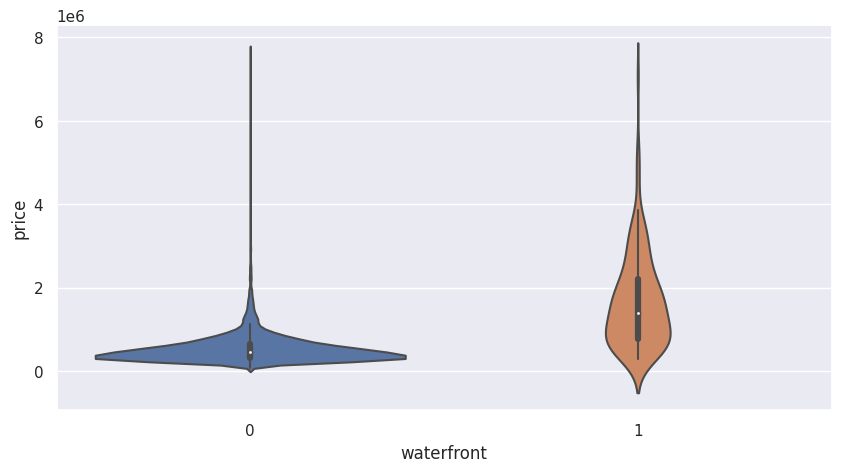

In [ ]:
sns.violinplot(data =df,x = "waterfront" ,y ="price")
plt.show()

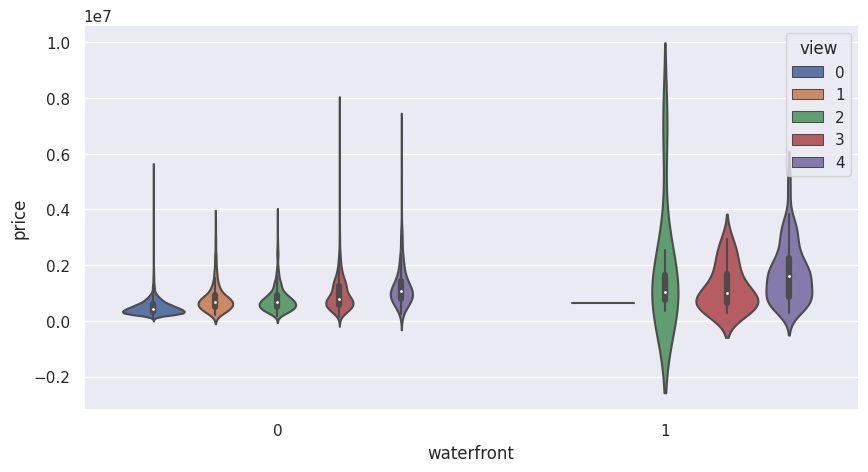

In [ ]:
sns.violinplot(data =df,x = "waterfront" ,y ="price" , hue ="view")
plt.show()

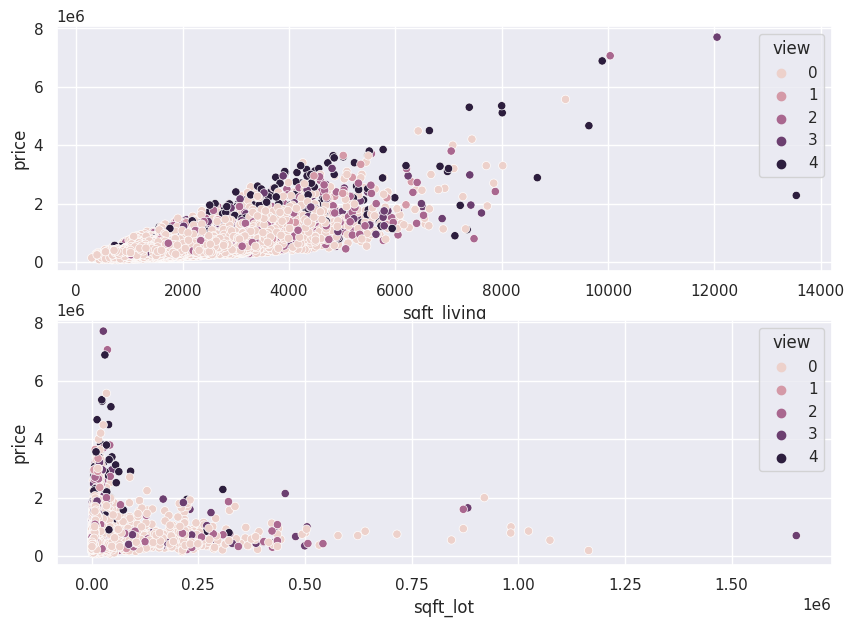

In [ ]:
plt.figure(figsize =(10 , 7))

plt.subplot(2,1,1)
sns.scatterplot(data =df,x = 'sqft_living',y= 'price', hue ="view")

plt.subplot(2,1,2)
sns.scatterplot(data =df,x = 'sqft_lot',y= 'price', hue ="view")
plt.show()

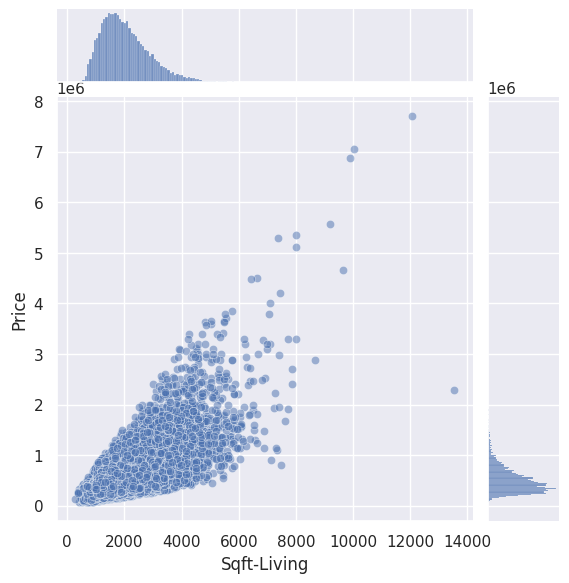

In [ ]:
sns.jointplot(x= df.sqft_living,y =  df.price, alpha = 0.5)
plt.xlabel('Sqft-Living')
plt.ylabel('Price')
plt.show()

In [ ]:
if df.zipcode.corr(df.price) < 0.5 or df.zipcode.corr(df.price) > -0.5:
        print(df.zipcode.corr(df.price))
        df.drop("zipcode" , axis =1 , inplace =True)

-0.05306560663374282


In [ ]:
sns.pairplot(data = df)

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-32-bb2baf74ab1c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot =True , linewidth =0.2)


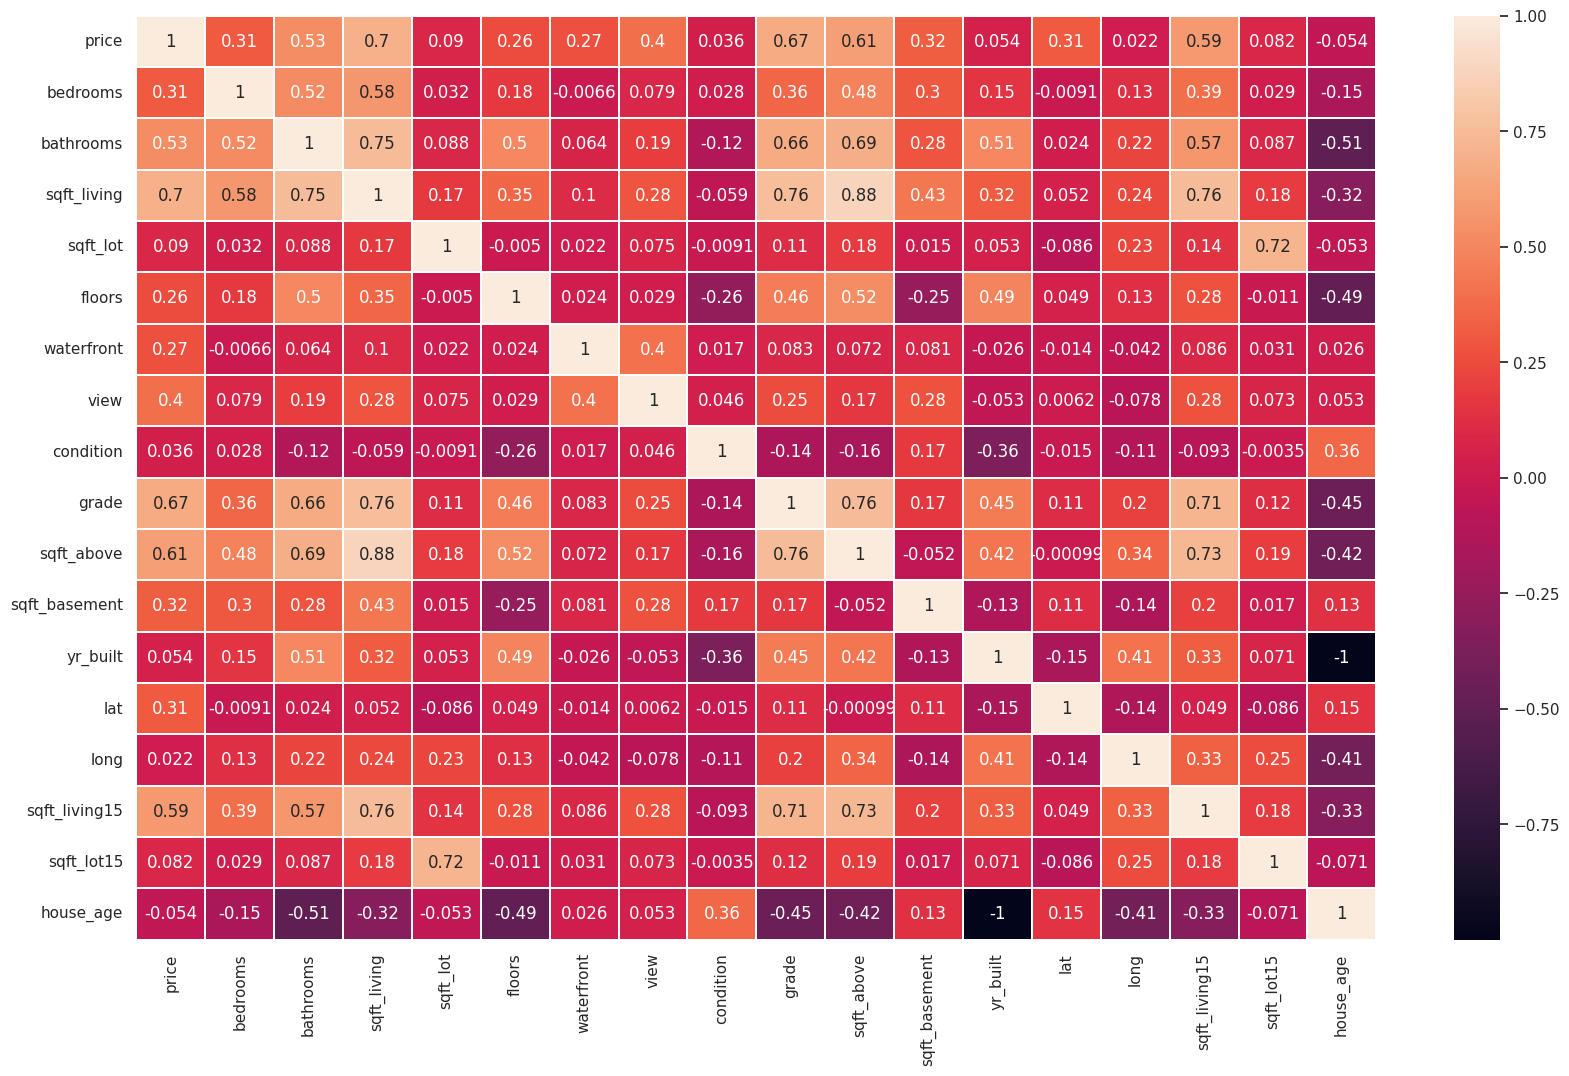

In [ ]:
### corrolation plot
plt.figure(figsize =(20,12))
sns.heatmap(df.corr() , annot =True , linewidth =0.2)
plt.show()

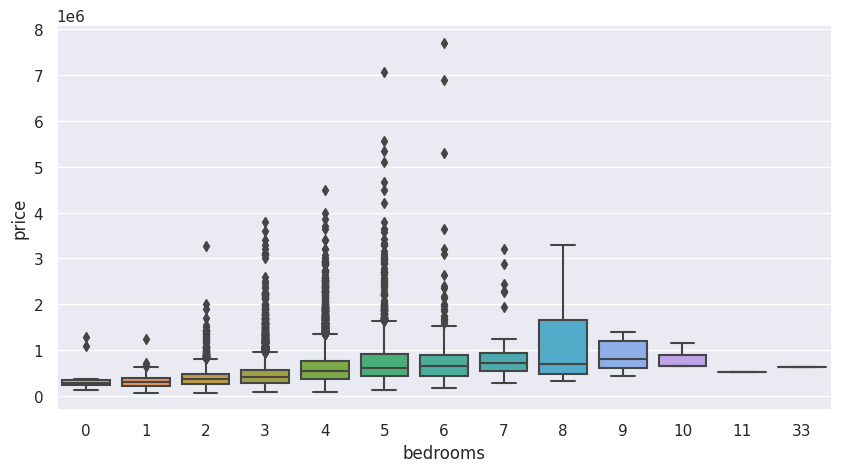

In [ ]:
sns.boxplot(x ='bedrooms' , y='price' , data =df )
plt.show()

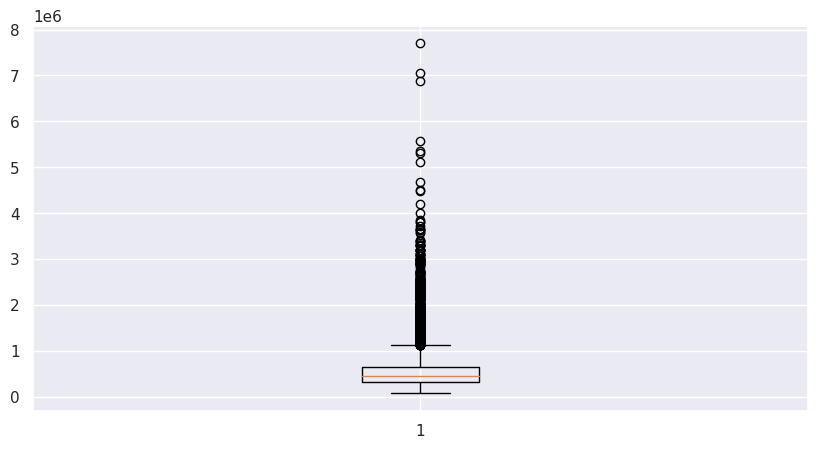

In [ ]:
plt.boxplot(df.price)
plt.show()

In [ ]:
def tukey(data):
    q1  , q3 = np.percentile(data, [25 ,75])

    iqr = q3 - q1
    lower = q1 - (iqr * 1.5)
    upper = q3 + (iqr * 1.5)

    return np.where((data > upper) | (data < lower))

In [ ]:
noise_index =  tukey(df.price)[0]

In [ ]:
df.drop(noise_index , inplace =True)

In [ ]:
df.drop("date",axis =1 , inplace =True)

In [ ]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,63


In [ ]:
# Here we assign features  to the X and price to the y
X= df.drop("price", axis=1).values
y= df["price"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, y_train.shape

((14322, 17), (14322,))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Linear Regression:
RMSE: 113051.88
R-squared: 0.70


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameter grid
param_grid = {"alpha": [0.01, 0.1, 1.0, 10.0]}

# Create Ridge Regression model
model = Ridge()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Ridge Regression:
Best Parameters: {'alpha': 0.01}
RMSE: 113052.00
R-squared: 0.70


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameter grid
param_grid = {"alpha": [0.01, 0.1, 1.0, 10.0]}

# Create Lasso Regression model
model = Lasso()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.618e+13, tolerance: 4.961e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.758e+13, tolerance: 5.084e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.660e+13, tolerance: 5.092e

Lasso Regression:
Best Parameters: {'alpha': 0.01}
RMSE: 113241.63
R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.633e+13, tolerance: 6.306e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameter grid
param_grid = {"max_depth": [None, 5, 10, 20]}

# Create Decision Tree Regression model
model = DecisionTreeRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Decision Tree Regression:
Best Parameters: {'max_depth': 10}
RMSE: 96178.49
R-squared: 0.78
